<a href="https://colab.research.google.com/github/cerasole/EnvironmentalRadioactivity/blob/main/Notebooks/AttenuationLenghts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lunghezze di assorbimento gamma in diversi materiali

In questo Colab, valutiamo la lunghezze di assorbimento di diversi materiali ai raggi gamma.

Come è definita la lunghezza di assorbimento?

Consideriamo un fascio monoenergetico di raggi gamma in moto con una certa direzione fissata, indicata come asse $x$. Sia l'intensità di questo fascio pari ad $I_0$ ad $x = 0$: $I(x = 0) = I_0$.

Dopo una distanza $x$, l'intensità si è ridotta da $I(x = 0) = I_0$ fino a $I(x)=I_0 e^{-x/\mu}$, a causa dell'assorbimento.

La lunghezza di assorbimento $\mu$ è definita come la distanza dopo la quale l'intensità della radiazione di è ridotta da $I_0$ fino a $I_0/e$, ove $e\approx2.71$ è il numero di Nepero.

Il sito [https://physics.nist.gov/PhysRefData/XrayMassCoef/tab4.html] contiene varie tabelle di $1/(\mu\rho)$, espresse in cm$^2$/g, ove $\rho$ è la densità del materiale.

Prima di tutto scarichiamo questi file.

In [31]:
!wget https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/AttenuationLenghts/att_length_Air.txt
!wget https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/AttenuationLenghts/att_length_Lead.txt
!wget https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/AttenuationLenghts/att_length_NaI.txt
!wget https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/AttenuationLenghts/att_length_Bone.txt
!wget https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/AttenuationLenghts/att_length_Muscle.txt

--2025-02-01 17:11:55--  https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/AttenuationLenghts/att_length_Air.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1373 (1.3K) [text/plain]
Saving to: ‘att_length_Air.txt.2’

att_length_Air.txt. 100%[===================>]   1.34K  --.-KB/s    in 0s      

2025-02-01 17:11:56 (60.1 MB/s) - ‘att_length_Air.txt.2’ saved [1373/1373]

--2025-02-01 17:11:56--  https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/AttenuationLenghts/att_length_Lead.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... co

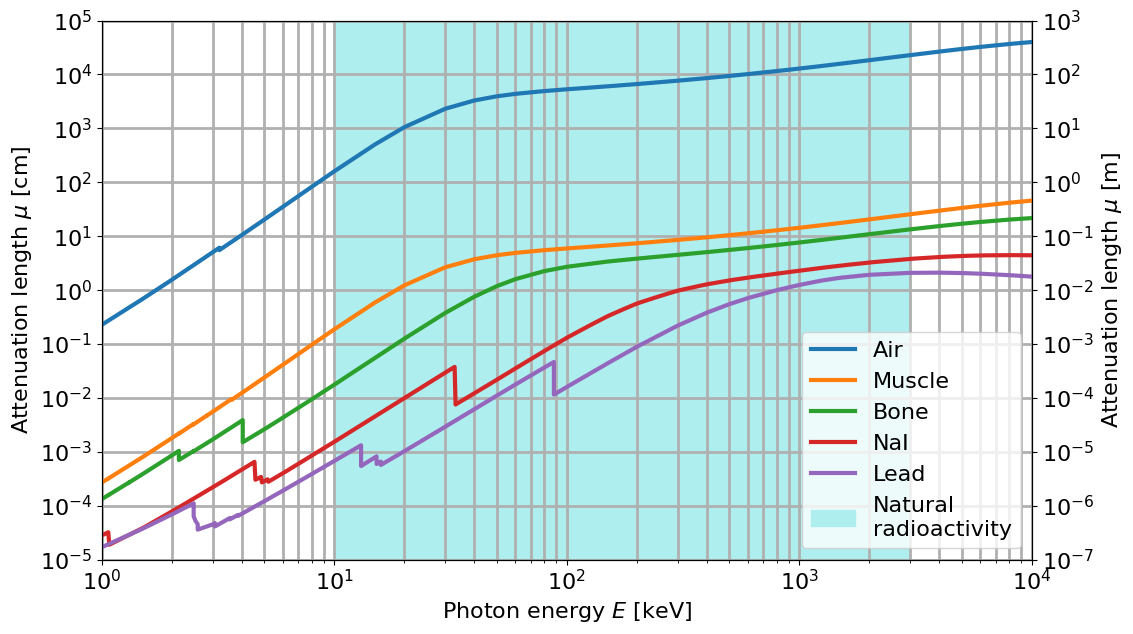

In [61]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

plt.rc("font", size = 16)

elements = ["Air", "Muscle", "Bone", "NaI", "Lead"]
densities = [1.225e-3, 1., 2., 3.67, 11.34]  # g/cm3
filename = "att_length_%s.txt"
N = len(elements)

fig, ax = plt.subplots(figsize = (12, 7))
for i in range(N):
  filename_ = filename % elements[i]
  e_MeV, att_coeff_cm2_g = np.loadtxt(filename_, unpack = True, usecols = (0, 1))
  if elements[i] != "NaI":
      energy = e_MeV * 1e3
  else:
      energy = e_MeV

  mu = 1 / (att_coeff_cm2_g * densities[i])
  ax.plot(energy, mu, label=elements[i], lw = 3)

ax.fill_between([10, 3000], [1e5, 1e5], [0, 0], color = "paleturquoise", label = "Natural\nradioactivity")

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Photon energy $E$ [keV]")
ax.set_ylabel("Attenuation length $\mu$ [cm]")
ax.legend(fontsize = 16)
ax.set_yticks(np.logspace(-5,6, 12))
ax.set_ylim(1e-5, 1e5)
ax.grid(which="both", lw = 2)
ax.set_xlim(1, 1e4)

ax2 = ax.twinx()
ax2.set_yscale("log")
ax2.tick_params(axis='y')
ax2.set_ylabel("Attenuation length $\mu$ [m]")
ax2.set_yticks(np.logspace(-7, 3, 11));